**Import Libraries**

In [14]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Advertising Dataset**

In [15]:
df=pd.read_csv('Advertising.csv')

In [16]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
#drop unwanted coloumn
df.drop("Unnamed: 0", axis=1, inplace=True)

* **inplace=True**   insure that the change will be reflect in original file

In [18]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Describe the data**

In [19]:
df.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


* from the describe we can do sanity check of the data and if there is somthing nasty in data we can correct it before going for futher analysis

**check out for Outliers**

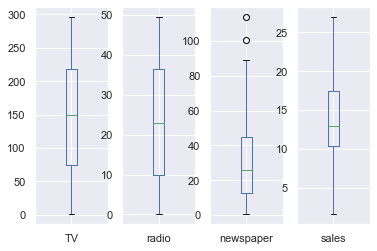

In [25]:
#boxplots
df.plot(kind='box', subplots=True);
#subplots=True => gives the each variable with diffrent plot otherwise it will give all variable in single plot

* it is clear that TV, Radio and target variable sales does not have outlier 
* newspaper has the 2 outliers
* so we will treat the outliers of newspapers

In [28]:
# treat outlier
q1,q3=df['newspaper'].quantile([0.25, 0.75])
IQR=q3-q1
UL=q3+1.5*IQR
LL=q1-1.5*IQR

df['newspaper']=np.where(df['newspaper']>UL, UL, df['newspaper'])

* if there is data point which is greater than UL (Outlier)
* then we are pulling dowm it to UL (pulldown)
* else we are keep as it is

**Note:**
* it is upto us how we treat the outlier we may delet it, we may ignore it, or it we may pull it down
* but while using linear regression it is nesessary to pull it down or delet it 
* becouse one oulier also badly affect on our linear regression model

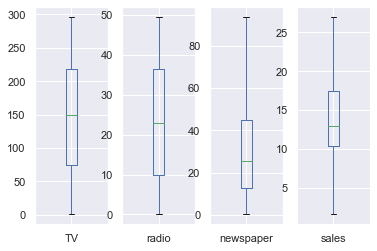

In [29]:
df.plot(kind='box', subplots=True);

**Split the data**

In [32]:
#split the Variable 
X=df.drop('sales', axis=1)
y=df['sales']

In [30]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [34]:
#split the dataset into 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=7)

**random_state=7**
* is not mandatory in the code 
* it used to get the same training and testing data every time when i run the code
* if we not used random_state then every time i will get slightly diffrent result
* we can use any interger number after random_state 

In [35]:
df.shape

(200, 4)

In [36]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

**Train the linear Regression model**

In [37]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Coefficients of the model**

In [40]:
#get the coefficient
lr.coef_

array([ 0.04629801,  0.18880122, -0.00100282])

In [41]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

* first coef for first column (TV)
* second coef for second column (radio)
* third coef for third column (nextewspaper)

In [42]:
lr.intercept_

2.848412548439974

* this is the y intercept in the linear Reggression 

Therefor the equation become
* **sales= 2.84 + 0.04\*TV + 0.19\*radio + 0.001\*newspaper**

**note:**
* even if spend 0 on advertisement on TV, Radio, newspaper 
* then also we get the sales of 2.84 which is y intercept

**Evaluate the Performance**

In [45]:
#prediction on train and test dataset
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
rmse_train = mean_squared_error(y_train, train_pred, squared=False)
rmse_test = mean_squared_error(y_test, test_pred, squared=False)
rmse_train, rmse_test

(1.6957711089912768, 1.558510777921377)

* train dataset rmse=1.6957711089912768, 
* test dataset rmse=1.558510777921377
* lower rmse score is better

**is this rmse good or bad ?**
* just by looking into rmse we cannot say that
* the beter way is by getting the margin of error 
* which is given below code

In [51]:
rmse_train/y_train.mean() # margin of error on training dataset

0.11889197556575273

* which means that on training dataset the margin of error around 12%

In [53]:
rmse_test/y_test.mean()# margin of error on testing dataset

0.1193346690598298

* which means that on testing dataset the margin of error around 12%

In [50]:
# r2 scoer
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
train_r2, test_r2

(0.8929135972742749, 0.9095593368967716)

* we are getting 90% r2_score in both train and test data 
* which means that model is able to explain the 90% of variation in target variable of train and test data

**Residual of the model**

In [56]:
# calculate the residuals for the predictions = error in prediction
residuals = y_test - test_pred
residuals

86     0.443061
120    1.096137
22    -0.811746
11     0.084187
195    2.298278
2     -2.941219
121   -0.765259
94     1.046895
66     0.550896
63     0.816690
108    1.795235
96    -0.951786
138   -0.108621
65     1.502076
188   -2.810269
155   -2.022612
24     1.606678
99     0.265116
153    0.763137
46     1.765325
178   -4.269547
139    1.004417
143    1.667146
74    -0.359780
186    0.623208
169   -3.005811
101    0.469263
197    0.007407
109    0.053839
177   -0.465683
57     0.437462
106    1.147108
160    0.178666
84     0.882406
124    0.202325
85    -0.001245
126   -3.903162
183    1.989831
80     0.395790
116    0.232720
Name: sales, dtype: float64

## Linear Regression Using Statsmodels Library

* stats model gives some detailed analaysis so we are doing Linear Regression Using Statsmodels Library

In [65]:
# import library
from statsmodels.formula.api import ols 

#ols=ordinary least square

In [62]:
# formula string
formula = 'sales ~ TV + radio + newspaper'

* before symbol \~ is target variable
* after symbol \~ are independent variable

In [64]:
# statsmodels requires that all indep variables and target variable be in a single dataframe
# so joining back together the indep & tgt vars of train & test datasets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test,y_test], axis=1)

In [66]:
# train the model
model = ols(formula=formula, data=train_df).fit()

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     433.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.98e-75
Time:                        17:37:55   Log-Likelihood:                -311.53
No. Observations:                 160   AIC:                             631.1
Df Residuals:                     156   BIC:                             643.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8484      0.369      7.720      0.000       2.120       3.577
TV             0.0463      0.002     28.692      0.000       0.043       0.049
radio          0.1888      0.010     19.798      0.000       0.170       0.208
newspaper     -0.0010      0.007     -0.144      0.885      -0.015       0.013
==============================================================================
Omnibus:                       51.032   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.406
Skew:                          -1.318   Prob(JB):                     2.92e-29
Kurtosis:                       6.572   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**interpretation of output**
* in first table the p value **(Prob (F-statistic)=1.98e-75)**
* the meaning of this is
                         
          *  P < 0.05 then it is statistically Valid LR model
          *  P > 0.05 then it is statistically not Valid LR model
   
 * R^2=0.893 and adj.R^2=0.891 are two important performance metrices
 * they define the independent variables(TV + radio + newspaper) ability to explain the  89% variation in dependent variable (Sales) 
   
  
 * second table gives the coefficient value
 * there also a p value column where same above concept is applied
 * therefor coefficient of intercept, TV and radio are statistically significant
 * where as newspaper 0.885 > 0.05 is statistically not significant this
 * we can say that sales value is not impacted by newspaper 
 * we can delet the newspaper feature 
 
 
 **Hypothesis testing**
 * Null Hypothesis (H0)= The relationship is not significant
 * Alternate Hypothesis (H1)= The relationship is Significant
 
 * P value < Threshold(0.05) then we reject the null hypothesis and accept the Alternate Hypothesis
 
 * in this model p value < 0.05 therefor model is Significant  

In [68]:
model.predict(test_df.drop('sales',axis=1))

86     11.556939
120    14.403863
22      6.411746
11     17.315813
195     5.301722
2      12.241219
121     7.765259
94     10.453105
66      8.949104
63     13.183310
108     3.504765
96     12.651786
138     9.708621
65      7.797924
188    18.710269
155     5.222612
24      8.093322
99     16.934884
153    18.236863
46      8.834675
178    16.069547
139    19.695583
143     8.732854
74     17.359780
186     9.676792
169    18.005811
101    23.330737
197    12.792593
109    19.746161
177    12.165683
57     12.762538
106     6.052892
160    14.221334
84     20.817594
124    19.497675
85     15.201245
126    10.503162
183    24.210169
80     11.404210
116    11.967280
dtype: float64

# End